Calcium oscillation simulations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


In [14]:
global I

In [2]:
# parameters
gamma0=0.1
gamma1=20.5
p1=8.5
p2=0.065
k1=12
k2=15
k3=1.8
km1=8
km2=1.65
km3=0.21
Cs=8.37
vr=0.185
I=1
mode = 1 

In [3]:
# %set initial conditions.  State is S = [ C R RI RIC RICC]
S0=np.array([0, 1, 0, 0, 0])

In [23]:
# TODO set up ode
def dSdt(t, S):
    I=1
    if (mode==2):
        if (t>20):
            I=0.7
        if (t>60):
            I=1.2
        if (t>90):
            I=4
   

    dS_dt = np.array([vr*(gamma0+gamma1*S[3])*(Cs-S[0]) - (p1*S[0]**4)/(p2**4+S[0]**4),
    -k1*I*S[1]+km1*S[2],
    -(km1+k2*S[0])*S[2]+ k1*I*S[1] + km2*S[3], 
    -(km2+k3*S[0])*S[3] + k2*S[0]*S[2] + km3*S[4],
    k3*S[0]*S[3] - km3*S[4]])

    return dS_dt


In [27]:
n_steps = 150
t0 = 0
tf = 150

In [24]:
t_eval = np.linspace(t0, tf, n_steps+1)
solution = solve_ivp(dSdt, t_span=(t0, tf), y0=S0, t_eval=t_eval)

In [25]:
t = solution.t
S = solution.y

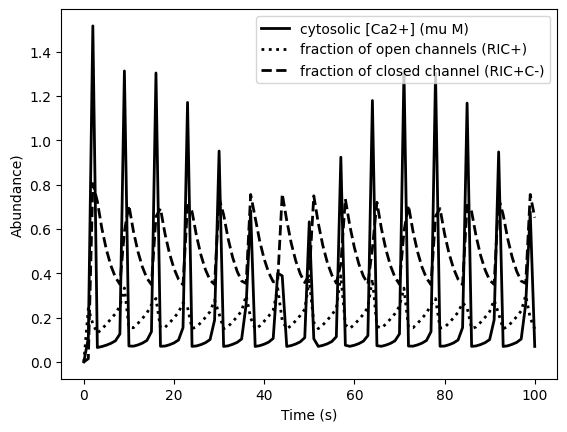

In [30]:
# generate Figure 6.18A
#plot(t, S(:,1), 'k', t, S(:,4), 'k:', t, S(:,5), 'k--', 'Linewidth', 2)
#legend('cytosolic [Ca^{2+}] (\mu M)', 'fraction of open channels (RIC+)', 'fraction of closed channel (RIC+C-)')
#xlabel('Time (s)')
#ylabel('Abdundance')
plt.plot(t, S[0,:], 'k', 
        t, S[3,:], 'k:', 
        t, S[4,:], 'k--',
        linewidth=2)
plt.legend(['cytosolic [Ca2+] (mu M)', 
            'fraction of open channels (RIC+)', 
            'fraction of closed channel (RIC+C-)'])
plt.xlabel('Time (s)')
plt.ylabel('Abundance)')
plt.show()

In [31]:
mode = 2
n_steps = 120
t0 = 0
tf = 120

In [32]:
t_eval = np.linspace(t0, tf, n_steps+1)
solution = solve_ivp(dSdt, t_span=(t0, tf), y0=S0, t_eval=t_eval)

In [33]:
t = solution.t
S = solution.y

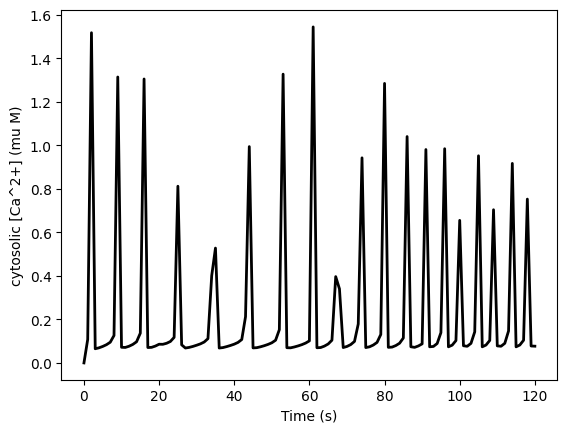

In [36]:
# figure 6.18b
plt.plot(t, S[0,:], 'k', 
        
        linewidth=2)
# plt.legend(['C8*', 'C3*'])
plt.xlabel('Time (s)')
plt.ylabel('cytosolic [Ca^2+] (mu M)')
plt.show()